<a href="https://colab.research.google.com/github/VHKA1729/Machine-Learning/blob/master/Absenteeism_At_Work_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <center> $\mathbf {TABLE \ OF \ CONTENTS}$</center>
[Assignment2A](#introduction)

1. [Importing Libraries and Data](#paragraph1)
2. [Exploratory Data Analysis](#paragraph2)
    1. [Missing Values](#subparagraph1)
    2. [Exploring Features](#subparagraph2)
    3. [Absenteeism and Feature Explorations](#subparagraph3)

3. [Question 1 & 2](#paragraph3)
    1. [Question 1](#subparagraph4)
    2. [Question 2](#subparagraph5)
      1. [On Whole Dataset](#heading1)
      2. [On Training Dataset](#heading2)
4. [Question 3](#paragraph4)
5. [Question 4](#paragraph5)
6. [Question 5](#paragraph6)
7. [Question 6: Multiple Discriminant Analysis](#paragraph7)

**Dataset**: "Absenteeism At Work Data Set" [LINK](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work)


# Importing Libraries and Data <a name="paragraph1"></a>

In [0]:
#Importing the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import graphviz

from scipy.stats import spearmanr, pearsonr
from scipy.cluster import hierarchy as hc

from sklearn.feature_selection import chi2, RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, validation_curve, learning_curve
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings

In [0]:
plt.style.use('seaborn')

In [0]:
warnings.filterwarnings('ignore')

In [0]:
#np.random.seed(1729)

In [0]:
SEED = 1729

In [0]:
data = pd.read_csv('Absenteeism dataset/Absenteeism_at_work.csv')

# **Exploratory Data Analysis** <a name="paragraph2"></a>

In [0]:
data.shape

(740, 21)

In [0]:
# exploring the datatypes of features
data.dtypes

ID                                  int64
Reason for absence                  int64
Month of absence                    int64
Day of the week                     int64
Seasons                             int64
Transportation expense              int64
Distance from Residence to Work     int64
Service time                        int64
Age                                 int64
Work load Average/day              object
Hit target                          int64
Disciplinary failure                int64
Education                           int64
Son                                 int64
Social drinker                      int64
Social smoker                       int64
Pet                                 int64
Weight                              int64
Height                              int64
Body mass index                     int64
Absenteeism time in hours           int64
dtype: object

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null object
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                           

The dataset has a size of 121.5+ KB

In [0]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"2,39,554",97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"2,39,554",97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"2,39,554",97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"2,39,554",97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"2,39,554",97,0,1,2,1,0,1,90,172,30,2


In [0]:
# Adjusting the datatypes as per the dataset description
data['Reason for absence'] = data['Reason for absence'].astype('category')
data['Month of absence'] = data['Month of absence'].astype('category')
data['Day of the week'] = data['Day of the week'].astype('category')
data['Seasons'] = data['Seasons'].astype('category')
data['Disciplinary failure'] = data['Disciplinary failure'].astype('category')
data['Education'] = data['Education'].astype('category')
data['Social drinker'] = data['Social drinker'].astype('category')
data['Social smoker'] = data['Social smoker'].astype('category')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null category
Month of absence                   740 non-null category
Day of the week                    740 non-null category
Seasons                            740 non-null category
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null object
Hit target                         740 non-null int64
Disciplinary failure               740 non-null category
Education                          740 non-null category
Son                                740 non-null int64
Social drinker                     740 non-null category
Social smoker                      740 non-null category
Pet   

The dataset size has reduced to 84.1+ KB from 121.5+ KB

## *Missing Values* <a name="subparagraph1"></a>

In [0]:
# No missing values in the dataset
data.isna().sum().sum()

0

## *Exploring Features* <a name="subparagraph2"></a>

### **Absenteeism time in hours**

In [0]:
len( list(set((data['Absenteeism time in hours']))))

19

In [0]:
list(set((data['Absenteeism time in hours'])))

[0, 1, 2, 3, 4, 32, 5, 7, 8, 40, 64, 104, 16, 80, 112, 48, 24, 56, 120]

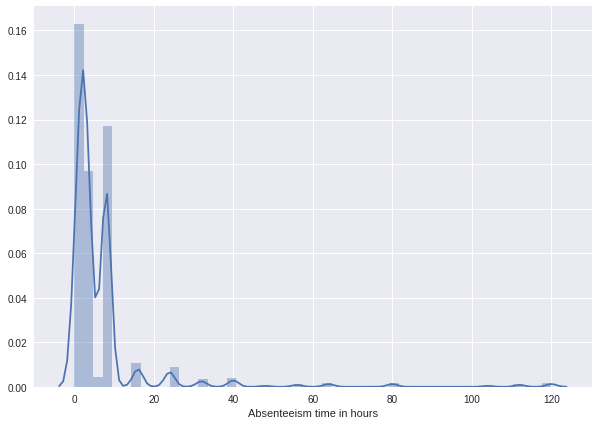

In [0]:
plt.figure(figsize=(10,7))
sns.distplot(data['Absenteeism time in hours'])

There are only a few unique values of Absenteeism Time. Further, we are trying to classify people in time ranges, hence, we will plot a countplot instead a continuous density plot

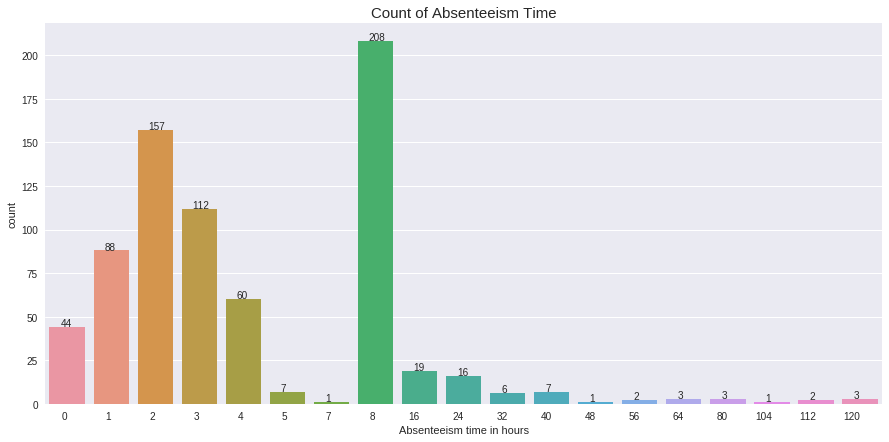

In [0]:
plt.figure(figsize=(15,7))
fig=sns.countplot(x= 'Absenteeism time in hours', data = data)
fig
fig.set_xticklabels(fig.get_xticklabels(), ha="right")

plt.title('Count of Absenteeism Time',size = 15)

for p, label in zip(fig.patches,pd.DataFrame(data["Absenteeism time in hours"].value_counts()).sort_index()['Absenteeism time in hours']):
    fig.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))


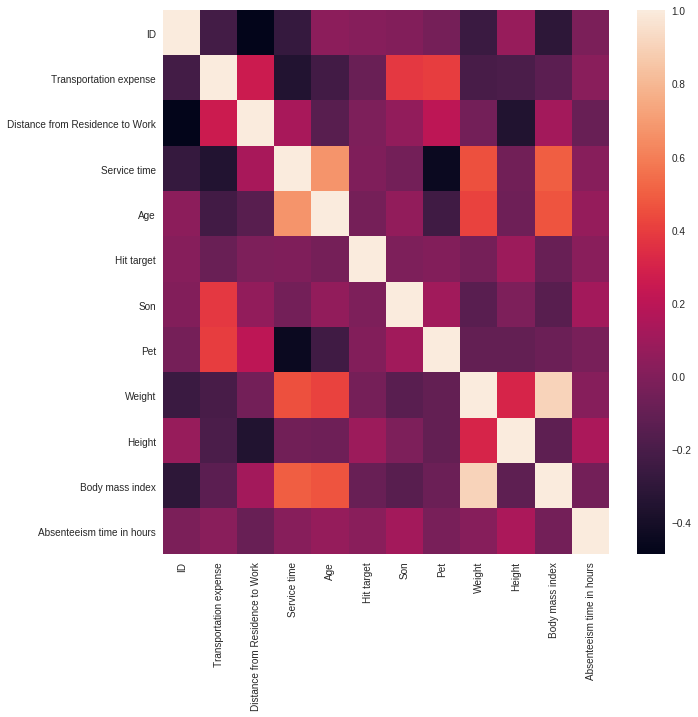

In [0]:
plt.figure(figsize= (10,10))
sns.heatmap(data.corr())

We see that beyond 8 hours, absenteeism has been recorded in integral multiples of 8. Further, the count of employees with absenteeism time > 8 is low. Since this is a classification problem, we need to build classes for "Absenteeism time in hours". Noticing the pattern, we create the following 4 classes:

<table>
  <tr>
    <th>Absenteeism Time (t) </th>
    <th>Class</th>
  </tr>
  
  <tr>
    <td>0</td>
    <td>Not Absent</td>
  </tr>
  
  <tr>
    <td>0 $\lt $ t $\lt$ 8</td>
    <td>Hours</td>
  </tr>

  <tr>
    <td>8 $\leq $ t $\lt$ 40</td>
    <td>Days</td>
  </tr>

  <tr>
    <td>40 $\leq $ t </td>
    <td>Weeks</td>
  </tr>

</table>

In [0]:
abs_bins = [-1,0.1, 8, 40, 2080]
abs_names = ['Not Absent', 'Hours', 'Days', 'Weeks']
data['Abs_class'] = pd.cut(data['Absenteeism time in hours'], abs_bins, labels=abs_names, right = False)

In [0]:
data['Abs_class']=data['Abs_class'].astype('category')

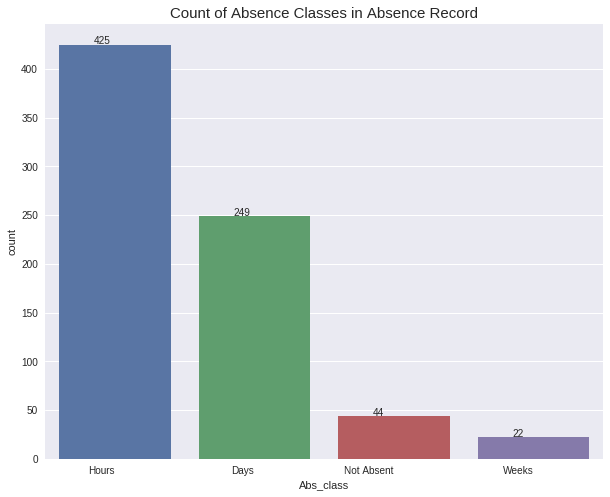

In [0]:
plt.figure(figsize=(10,8))
fig=sns.countplot(x= 'Abs_class', data = data, order = data["Abs_class"].value_counts().index)
fig
fig.set_xticklabels(fig.get_xticklabels(), ha="right")

plt.title('Count of Absence Classes in Absence Record',size = 15)

for p, label in zip(fig.patches, data["Abs_class"].value_counts()):
    fig.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

### **ID Column**

In [0]:
# number of unique IDs
len(data['ID'].unique())

36

In [0]:
# count of rows for each ID from the dataset
data.groupby('ID')[['ID']].count().head()

,ID
ID,
1,23
2,6
3,113
4,1
5,19


In [0]:
data["ID"].value_counts().head()

3     113
28     76
34     55
22     46
20     42
Name: ID, dtype: int64

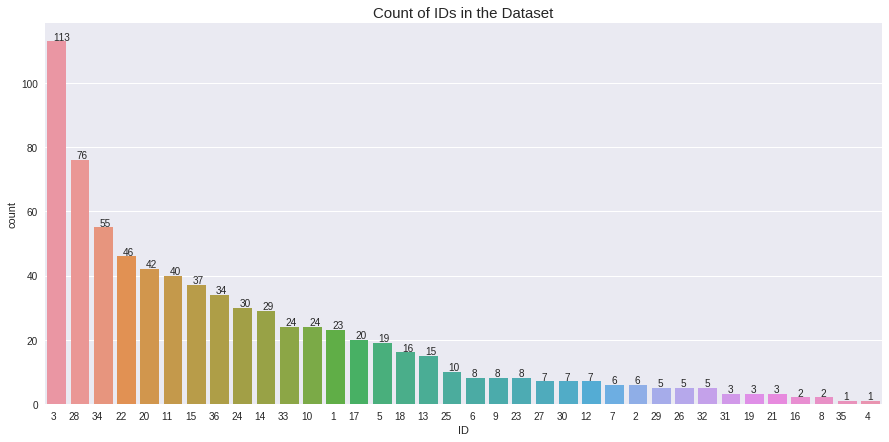

In [0]:
plt.figure(figsize=(15,7))
fig=sns.countplot(x= 'ID', data = data, order = data["ID"].value_counts().index)
fig
fig.set_xticklabels(fig.get_xticklabels(), ha="right")

plt.title('Count of IDs in the Dataset',size = 15)

for p, label in zip(fig.patches, data["ID"].value_counts()):
    fig.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

In [0]:
data[data['Absenteeism time in hours']==0]['ID'].count()

44

### **Reason for absence**

In [0]:
# Looking at the unique values of 'Reason for absence' feature
list(set((data['Reason for absence'])))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

1. Category "20" is absent from our dataset
2. Category "0" is present but it isn't a valid category since we have categories only from 1 to 20. Let us explore more and find what it means.

In [0]:
data[data['Reason for absence']==0].shape

(43, 22)

In [0]:
data[data['Reason for absence']==0]['Absenteeism time in hours'].sum()

0

In [0]:
data[data['Absenteeism time in hours']==0][['Absenteeism time in hours','Reason for absence']]

,Absenteeism time in hours,Reason for absence
1,0,0
50,0,0
51,0,0
54,0,0
55,0,0
58,0,0
64,0,0
134,0,27
203,0,0
213,0,0


In [0]:
data.iloc[134]

ID                                         34
Reason for absence                         27
Month of absence                            1
Day of the week                             2
Seasons                                     2
Transportation expense                    118
Distance from Residence to Work            10
Service time                               10
Age                                        37
Work load Average/day                3,08,593
Hit target                                 95
Disciplinary failure                        0
Education                                   1
Son                                         0
Social drinker                              0
Social smoker                               0
Pet                                         0
Weight                                     83
Height                                    172
Body mass index                            28
Absenteeism time in hours                   0
Abs_class                         

1. The above results shows that Category 0 corresponds to being absent, i.e., no 'Absenteeism time in hours'

2. Row 134 has Reason for absence as "27" but "Absenteeism time hours" as 0. It makes no sense to record a reason for absence if there was no absenteeism! Maybe an error was made or maybe the absenteeism time was less than one hour and upon conversion to hours, it was rounded-off to 0. However, this all lies in the realm of conjecture and given that the data-point is an outlier in this regard, it is safest to drop it.

3. If we had decided to not drop row 134, we would have imputed the "absenteeism time" by taking the mean of all observations with Reason for absence as 27. However, we have dropped the row since it makes more sense.

In [0]:
data = data.drop(index = 134)

In [0]:
data.groupby('Reason for absence')[['Reason for absence']].count().head()

,Reason for absence
Reason for absence,
0,43
1,16
2,1
3,1
4,2


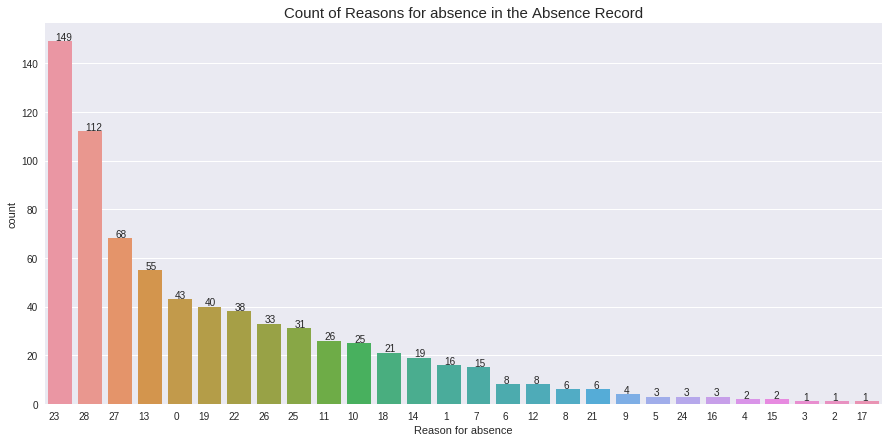

In [0]:
plt.figure(figsize=(15,7))
fig=sns.countplot(x= 'Reason for absence', data = data, order = data["Reason for absence"].value_counts().index)
fig
fig.set_xticklabels(fig.get_xticklabels(), ha="right")

plt.title('Count of Reasons for absence in the Absence Record',size = 15)

for p, label in zip(fig.patches, data["Reason for absence"].value_counts()):
    fig.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

### **Month of absence**

In [0]:
# Looking at the unique values of 'Reason for absence' feature
list(set((data['Month of absence'])))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [0]:
data[data['Month of absence']==0].shape

(3, 22)

In [0]:
data[data['Month of absence']==0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Abs_class
737,4,0,0,3,1,118,14,13,40,"2,71,219",95,0,1,1,1,0,8,98,170,34,0,Not Absent
738,8,0,0,4,2,231,35,14,39,"2,71,219",95,0,1,2,1,0,2,100,170,35,0,Not Absent
739,35,0,0,6,3,179,45,14,53,"2,71,219",95,0,1,1,0,0,1,77,175,25,0,Not Absent


In [0]:
data[data['ID']==4]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Abs_class
737,4,0,0,3,1,118,14,13,40,"2,71,219",95,0,1,1,1,0,8,98,170,34,0,Not Absent


In [0]:
data[data['ID']==8]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Abs_class
276,8,0,9,3,1,231,35,14,39,"2,94,217",81,1,1,2,1,0,2,100,170,35,0,Not Absent
738,8,0,0,4,2,231,35,14,39,"2,71,219",95,0,1,2,1,0,2,100,170,35,0,Not Absent


In [0]:
data[data['ID']==35]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Abs_class
739,35,0,0,6,3,179,45,14,53,"2,71,219",95,0,1,1,0,0,1,77,175,25,0,Not Absent


We will drop row 276 since the data is invalid. A person cannot have 0 absenteeism time and yet be recorded absent in a particular month.

In [0]:
data = data.drop(index = 276)

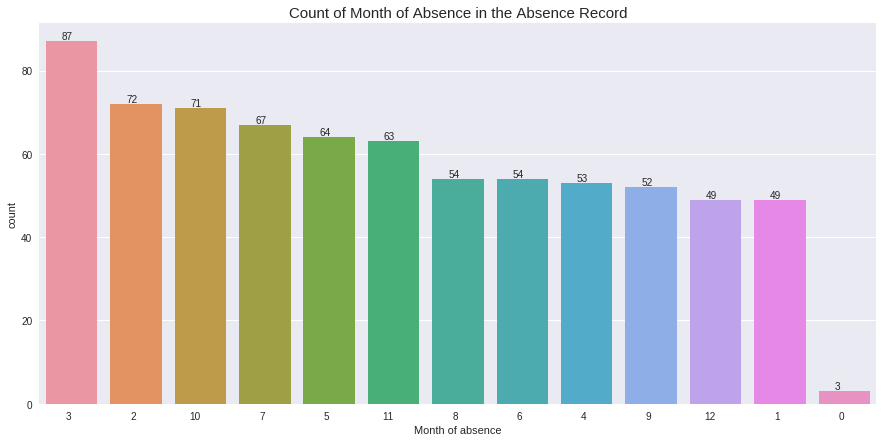

In [0]:
plt.figure(figsize=(15,7))
fig=sns.countplot(x= 'Month of absence', data = data, order = data["Month of absence"].value_counts().index)
fig
fig.set_xticklabels(fig.get_xticklabels(), ha="right")

plt.title('Count of Month of Absence in the Absence Record',size = 15)

for p, label in zip(fig.patches, data["Month of absence"].value_counts()):
    fig.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

### **Day of the week**

In [0]:
day_map = {2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'}
data['Day'] = data['Day of the week'].map(day_map)
data['Day'] = data['Day'].astype('category')
data.drop_duplicates(['Day of the week', 'Day'])[['Day of the week','Day']]
#data.head(1)

,Day of the week,Day
0,3,Tuesday
2,4,Wednesday
3,5,Thursday
5,6,Friday
8,2,Monday


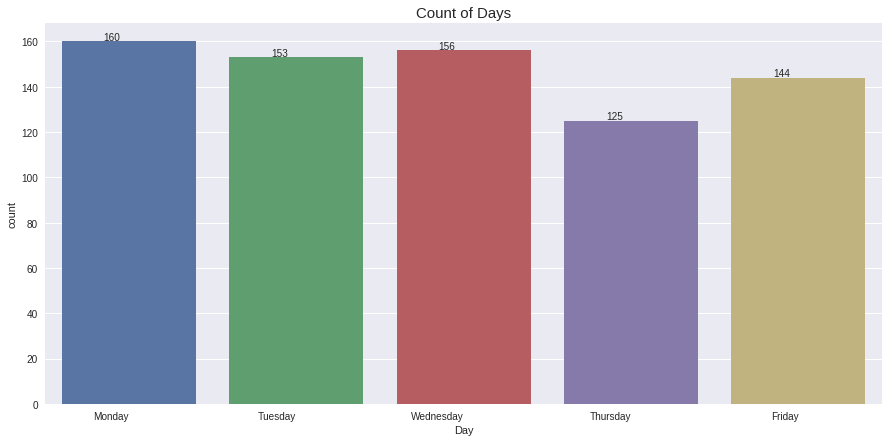

In [0]:
plt.figure(figsize=(15,7))
fig=sns.countplot(x= 'Day', data = data)
fig
fig.set_xticklabels(fig.get_xticklabels(), ha="right")

plt.title('Count of Days',size = 15)

for p, label in zip(fig.patches,pd.DataFrame(data["Day"].value_counts()).sort_index()['Day']):
    fig.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))


### **Seasons**

In [0]:
season_map = {1:'Summer', 2:'Autumn', 3:'Winter', 4:'Spring'}
data['Season_name'] = data['Seasons'].map(season_map)
data['Season_name'] = data['Season_name'].astype('category')
data.drop_duplicates(['Seasons', 'Season_name'])[['Seasons','Season_name']]
#data.shape

,Seasons,Season_name
0,1,Summer
49,4,Spring
111,2,Autumn
175,3,Winter


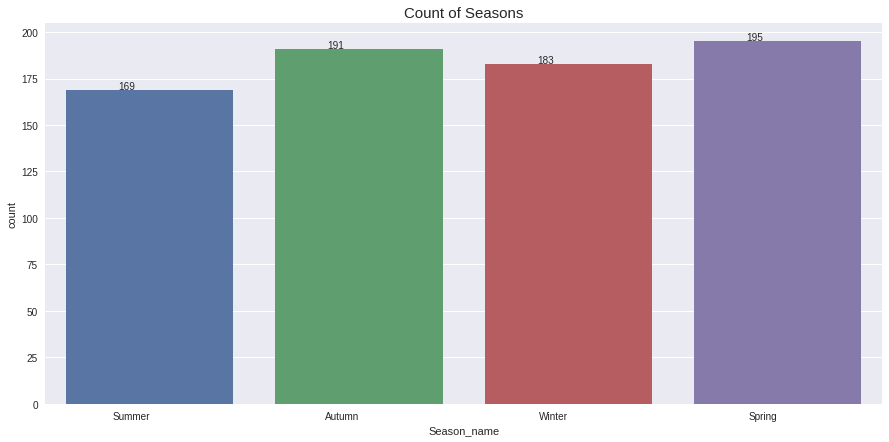

In [0]:
plt.figure(figsize=(15,7))
fig=sns.countplot(x= 'Season_name', data = data)
fig
fig.set_xticklabels(fig.get_xticklabels(), ha="right")

plt.title('Count of Seasons',size = 15)

for p, label in zip(fig.patches,pd.DataFrame(data["Season_name"].value_counts()).sort_index()['Season_name']):
    fig.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

### **Transportation Expense**

In [0]:
len(set(data['Transportation expense']))

24

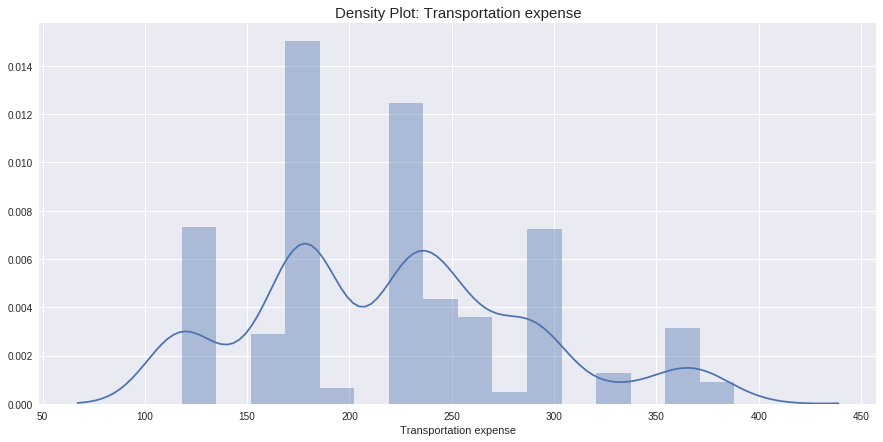

In [0]:
plt.figure(figsize=(15,7))
plt.title('Density Plot: Transportation expense',size = 15)
sns.distplot(data['Transportation expense'])

### **Distance from Residence to Work**

In [0]:
len(set(data['Distance from Residence to Work']))

25

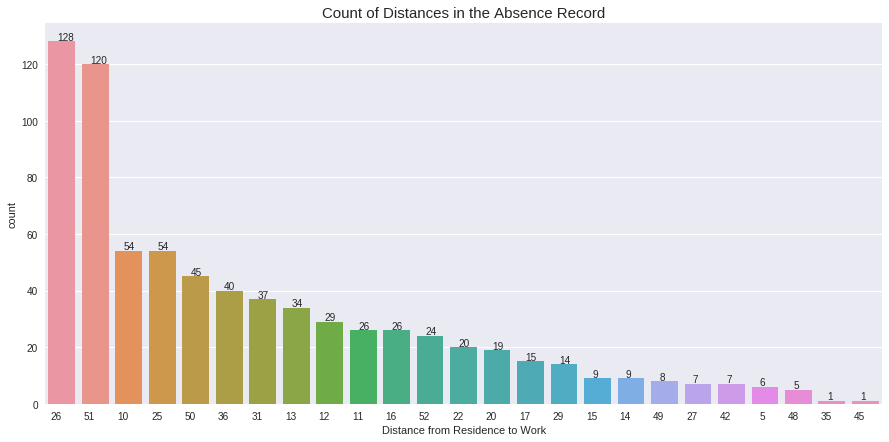

In [0]:
plt.figure(figsize=(15,7))
fig = sns.countplot  (x='Distance from Residence to Work', data=data, order=data['Distance from Residence to Work'].value_counts().index)
fig
fig.set_xticklabels(fig.get_xticklabels(), ha="right")

plt.title('Count of Distances in the Absence Record',size = 15)

for p, label in zip(fig.patches, data['Distance from Residence to Work'].value_counts()):
    fig.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

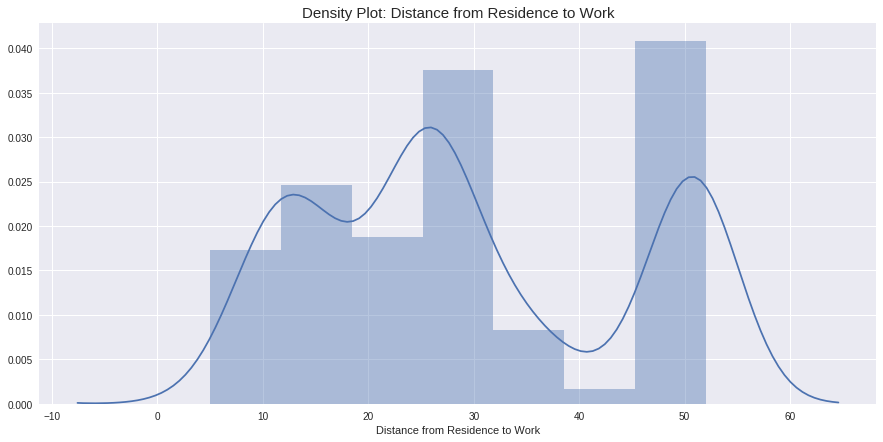

In [0]:
plt.figure(figsize=(15,7))
plt.title('Density Plot: Distance from Residence to Work',size = 15)
sns.distplot(data['Distance from Residence to Work'])

### **Service time**

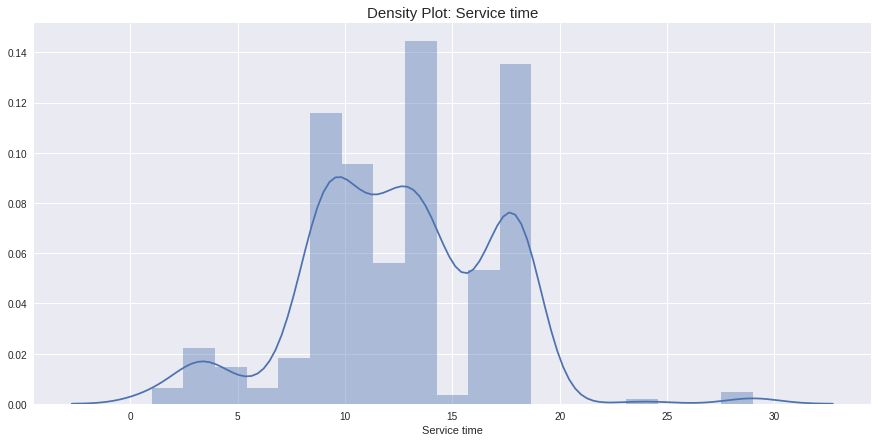

In [0]:
plt.figure(figsize=(15,7))
plt.title('Density Plot: Service time',size = 15)
sns.distplot(data['Service time'])

### **Age**

In [0]:
len(list(set(data['Age'])))

22

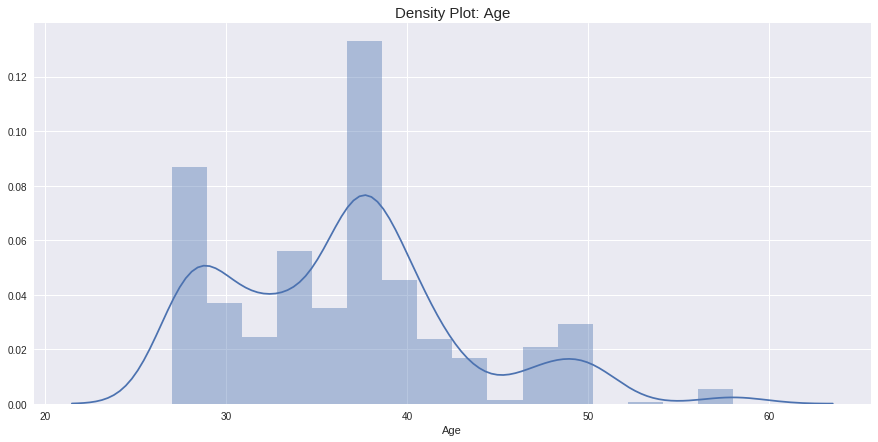

In [0]:
plt.figure(figsize=(15,7))
plt.title('Density Plot: Age',size = 15)
sns.distplot(data['Age'])

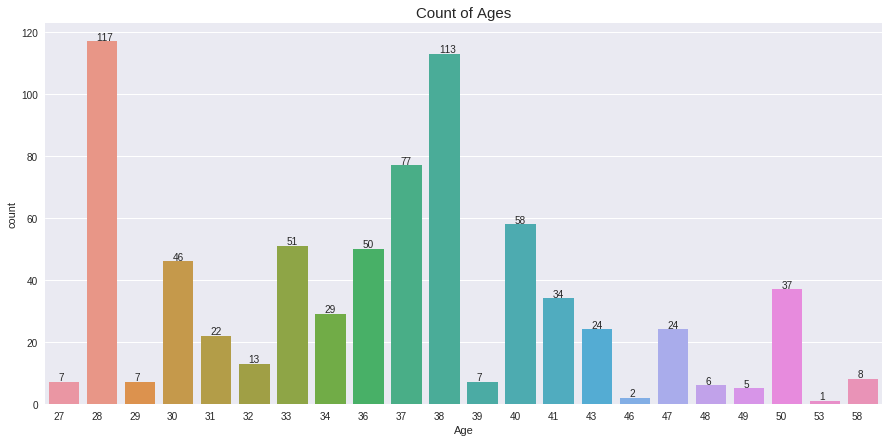

In [0]:
plt.figure(figsize=(15,7))
fig=sns.countplot(x= 'Age', data = data)
fig
fig.set_xticklabels(fig.get_xticklabels(), ha="right")

plt.title('Count of Ages',size = 15)

for p, label in zip(fig.patches,pd.DataFrame(data["Age"].value_counts()).sort_index()['Age']):
    fig.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))


### **Work load Average/day**

In [0]:
# Work load Average / day has "/". We replace it with "per".
data.columns = data.columns.str.replace('/', ' per ').str.strip()

In [0]:
#**Work load Average per day column's dataype is "Object" due to  ','  in its values. Hence, remove ','
data['Work load Average per day'] = data['Work load Average per day'].str.replace(',','')

In [0]:
data['Work load Average per day'] = data['Work load Average per day'].astype('float')

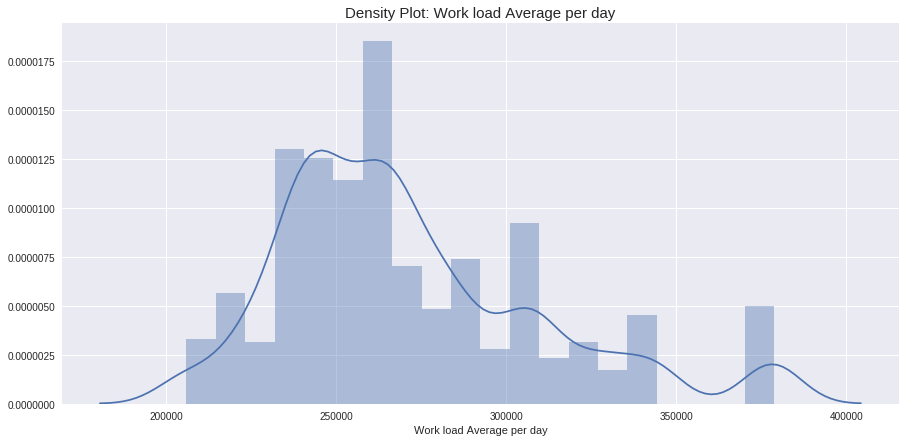

In [0]:
plt.figure(figsize=(15,7))
plt.title('Density Plot: Work load Average per day',size = 15)
sns.distplot(data['Work load Average per day'])

### **Hit target**

In [0]:
len(list(set(data['Hit target'])))

13

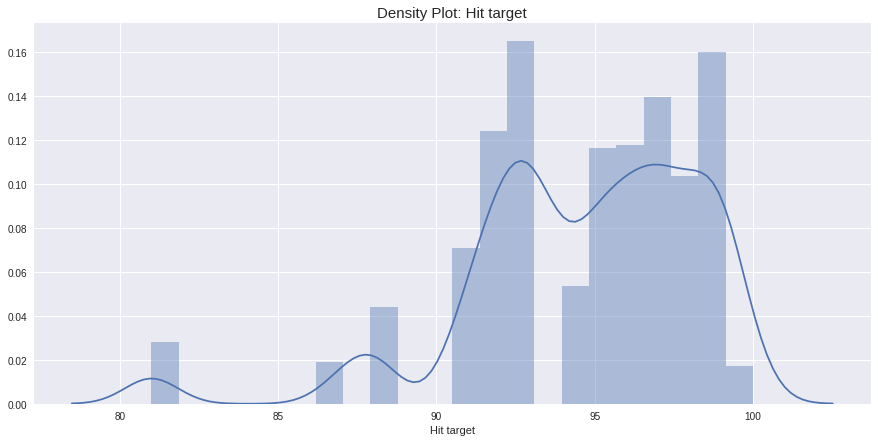

In [0]:
plt.figure(figsize=(15,7))
plt.title('Density Plot: Hit target',size = 15)
sns.distplot(data['Hit target'])

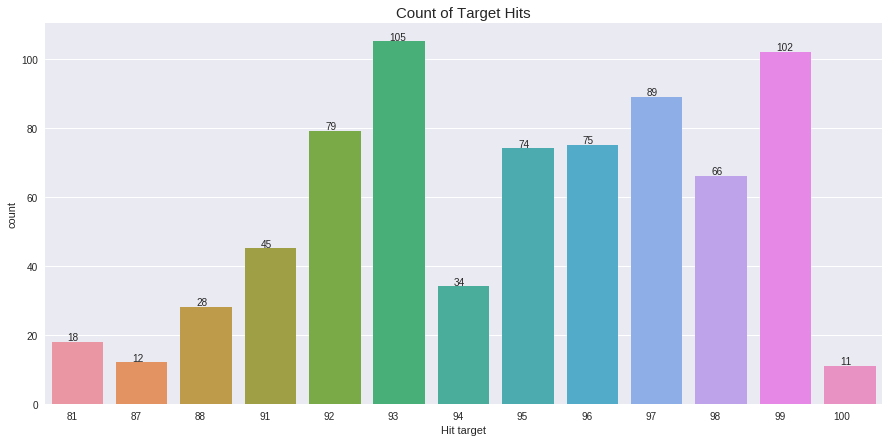

In [0]:
plt.figure(figsize=(15,7))
fig=sns.countplot(x= 'Hit target', data = data)
fig
fig.set_xticklabels(fig.get_xticklabels(), ha="right")

plt.title('Count of Target Hits',size = 15)

for p, label in zip(fig.patches,pd.DataFrame(data["Hit target"].value_counts()).sort_index()['Hit target']):
    fig.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

### **Disciplinary failure**

In [0]:
len(list(set(data['Disciplinary failure'])))

2

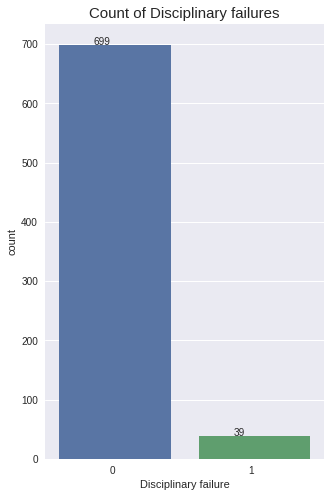

In [0]:
plt.figure(figsize=(5,8))
fig=sns.countplot(x= 'Disciplinary failure', data = data)
fig
fig.set_xticklabels(fig.get_xticklabels(), ha="right")

plt.title('Count of Disciplinary failures',size = 15)

for p, label in zip(fig.patches,pd.DataFrame(data["Disciplinary failure"].value_counts()).sort_index()['Disciplinary failure']):
    fig.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

### **Education**

In [0]:
education_map = {1: 'High School',2: 'Graduate',3: 'Post Graduate',4: 'Master & Doctor'}
education_list = {'High School', 'Graduate', 'Post Graduate', 'Master & Doctor'}
data['Education_detail'] = data['Education'].map(education_map)
data['Education_detail'] = data['Education_detail'].astype('category')
#category_education = pd.api.types.CategoricalDtype(categories=education_list, ordered=True)
#data['Education_detail'] = data['Education_detail'].astype(category_education)

In [0]:
len(list(set(data['Education_detail'])))

4

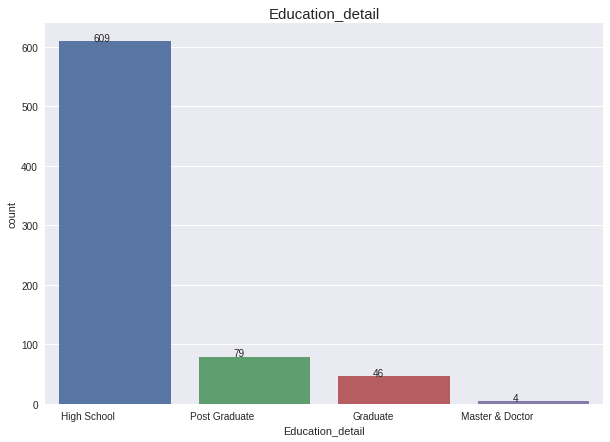

In [0]:
plt.figure(figsize=(10,7))
fig=sns.countplot(x= 'Education_detail', data = data, order = data["Education_detail"].value_counts().index)
fig
fig.set_xticklabels(fig.get_xticklabels(), ha="right")

plt.title('Education_detail',size = 15)

for p, label in zip(fig.patches, data["Education_detail"].value_counts()):
    fig.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

### **Son**

In [0]:
len(list(set(data['Son'])))

5

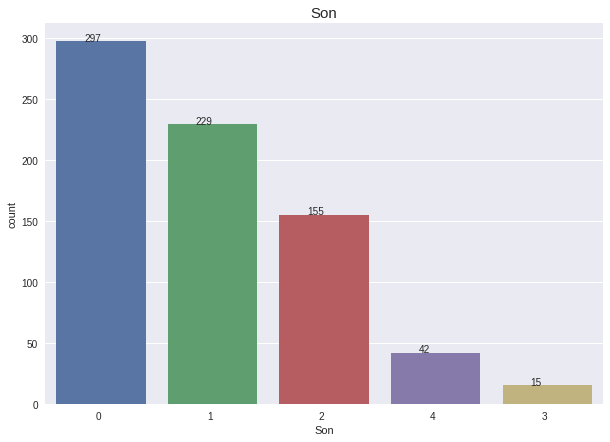

In [0]:
plt.figure(figsize=(10,7))
fig=sns.countplot(x= 'Son', data = data, order = data["Son"].value_counts().index)
fig
fig.set_xticklabels(fig.get_xticklabels(), ha="right")

plt.title('Son',size = 15)

for p, label in zip(fig.patches, data["Son"].value_counts()):
    fig.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

### **Social drinker**

In [0]:
len(list(set(data['Social drinker'])))

2

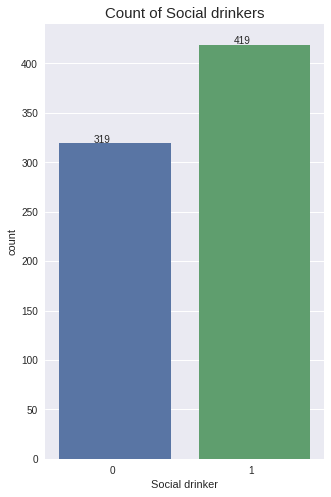

In [0]:
plt.figure(figsize=(5,8))
fig=sns.countplot(x= 'Social drinker', data = data)
fig
fig.set_xticklabels(fig.get_xticklabels(), ha="right")

plt.title('Count of Social drinkers',size = 15)

for p, label in zip(fig.patches,pd.DataFrame(data["Social drinker"].value_counts()).sort_index()['Social drinker']):
    fig.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

### **Social smoker**

In [0]:
len(list(set(data['Social smoker'])))

2

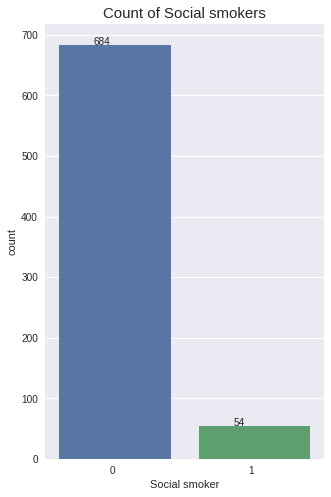

In [0]:
plt.figure(figsize=(5,8))
fig=sns.countplot(x= 'Social smoker', data = data)
fig
fig.set_xticklabels(fig.get_xticklabels(), ha="right")

plt.title('Count of Social smokers',size = 15)

for p, label in zip(fig.patches,pd.DataFrame(data["Social smoker"].value_counts()).sort_index()['Social smoker']):
    fig.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

### **Pet**

In [0]:
len(list(set(data['Pet'])))

6

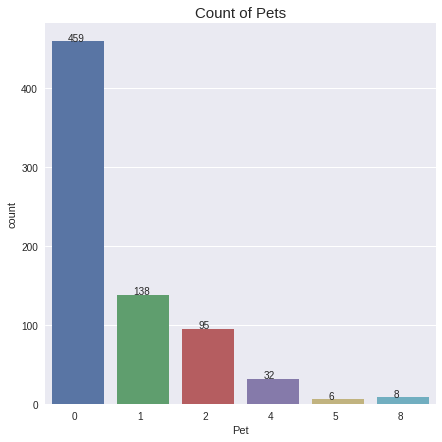

In [0]:
plt.figure(figsize=(7,7))
fig=sns.countplot(x= 'Pet', data = data)
fig
fig.set_xticklabels(fig.get_xticklabels(), ha="right")

plt.title('Count of Pets',size = 15)

for p, label in zip(fig.patches,pd.DataFrame(data["Pet"].value_counts()).sort_index()['Pet']):
    fig.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

### **Weight**

Text(0.5, 1.0, 'Density Plot: Weight')

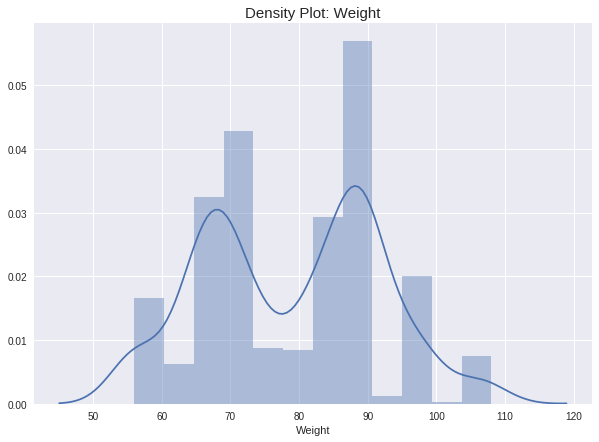

In [0]:
plt.figure(figsize=(10,7))
sns.distplot(data['Weight'])
plt.title('Density Plot: Weight', size =15)

### **Height**

Text(0.5, 1.0, 'Density Plot: Height')

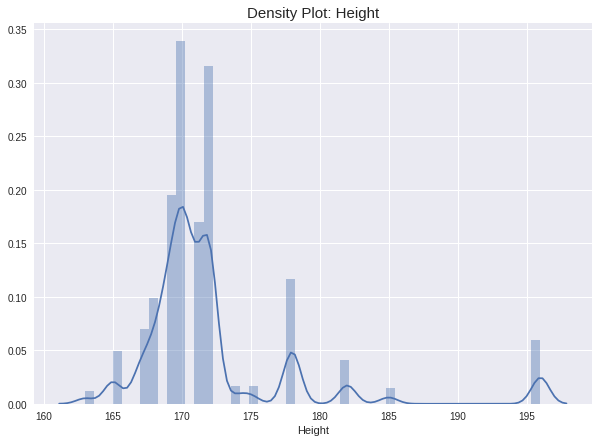

In [0]:
plt.figure(figsize=(10,7))
sns.distplot(data['Height'])
plt.title('Density Plot: Height', size =15)

### **Body mass index**

Text(0.5, 1.0, 'Density Plot: Body mass index')

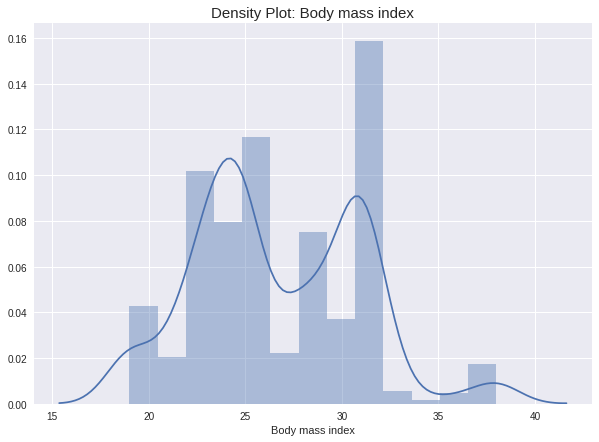

In [0]:
plt.figure(figsize=(10,7))
sns.distplot(data['Body mass index'])
plt.title('Density Plot: Body mass index', size =15)

## *Absenteeism and Feature Explorations* <a name="subparagraph3"></a>

### Age and Absenteeism

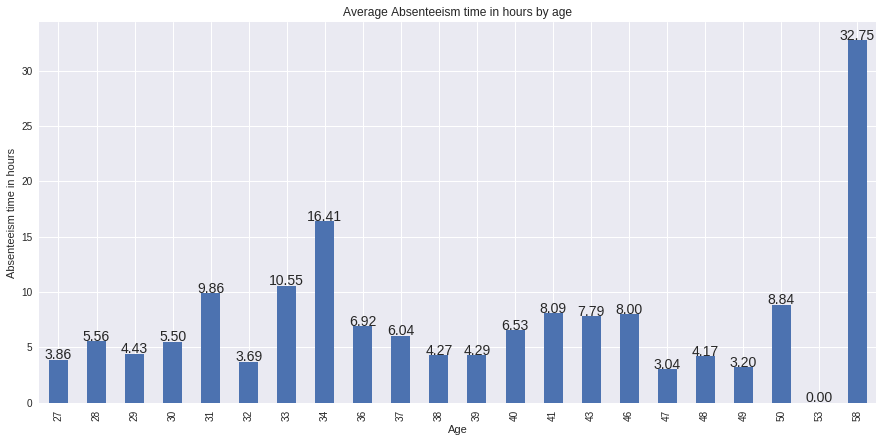

In [0]:
age_abs = data.groupby('Age')[['Absenteeism time in hours']].mean()
fig = age_abs.plot(kind='bar', figsize=(15,7), legend=False)

fig.set_ylabel('Absenteeism time in hours')
fig.set_title('Average Absenteeism time in hours by age')

for p in fig.patches:
    fig.text(p.get_x()+p.get_width()/2, p.get_height()+0.05, '{:1.2f}'.format(p.get_height()), ha="center", fontsize=14)

### Absenteeism and Seasons

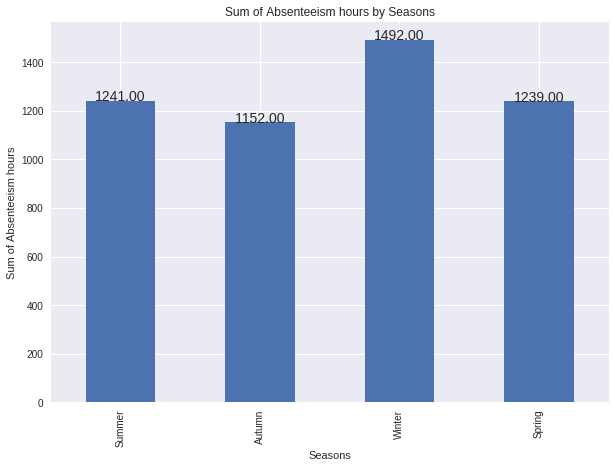

In [0]:
season_abs = data.groupby('Season_name')['Absenteeism time in hours'].sum()
fig = season_abs.plot(kind='bar', figsize=(10,7), legend=False)

fig.set_xlabel('Seasons')
fig.set_ylabel('Sum of Absenteeism hours')
fig.set_title('Sum of Absenteeism hours by Seasons')

for p in fig.patches:
    fig.text(p.get_x()+p.get_width()/2, p.get_height()+0.05, '{:1.2f}'.format(p.get_height()), ha="center", fontsize=14)

### Absenteeism and Months

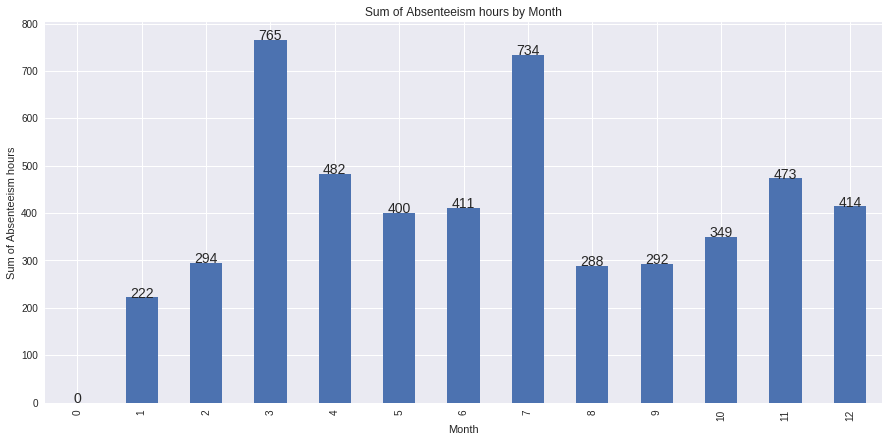

In [0]:
month_abs = data.groupby('Month of absence')['Absenteeism time in hours'].sum()
fig = month_abs.plot(kind='bar', figsize=(15,7), legend=False)

fig.set_xlabel('Month')
fig.set_ylabel('Sum of Absenteeism hours')
fig.set_title('Sum of Absenteeism hours by Month')
for p in fig.patches:
    fig.text(p.get_x()+p.get_width()/2, p.get_height()+0.05, p.get_height(), ha="center", fontsize=14)

### Absenteeism and Social Habits

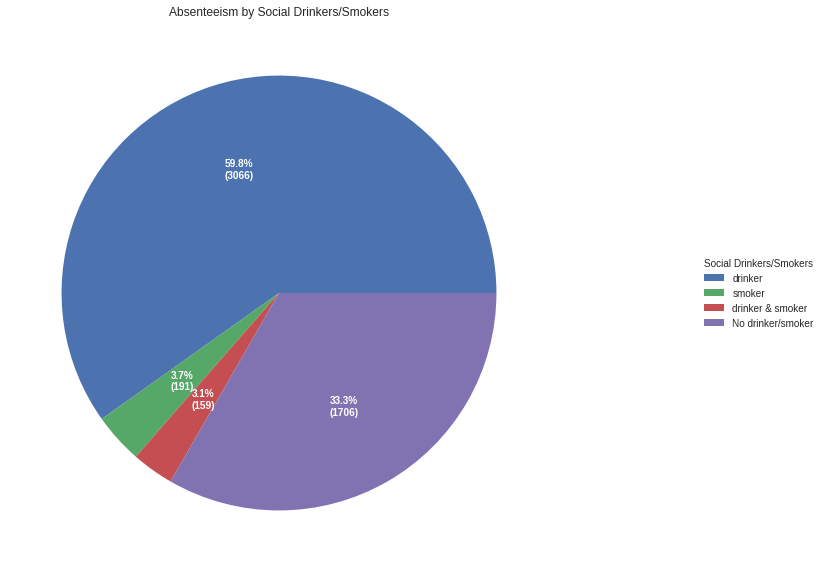

In [0]:
drink_sum = data[(data['Social drinker'] == 1) & (data['Social smoker']==0)]['Absenteeism time in hours'].sum()
smok_sum = data[(data['Social drinker'] == 0) & (data['Social smoker']==1)]['Absenteeism time in hours'].sum()
drink_smok_sum = data[(data['Social drinker'] == 1) & (data['Social smoker']==1)]['Absenteeism time in hours'].sum()
abs_sum = data[(data['Social drinker'] == 0) & (data['Social smoker']==0)]['Absenteeism time in hours'].sum()

absen = [drink_sum, smok_sum, drink_smok_sum, abs_sum]
pie_labels = ['drinker', 'smoker', 'drinker & smoker', 'No drinker/smoker']
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(absen, autopct=lambda pct: func(pct, absen), textprops=dict(color='w'))
ax.legend(wedges, pie_labels, title='Social Drinkers/Smokers', loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title('Absenteeism by Social Drinkers/Smokers')
#plt.pie(absen, labels=pie_labels)
plt.show()

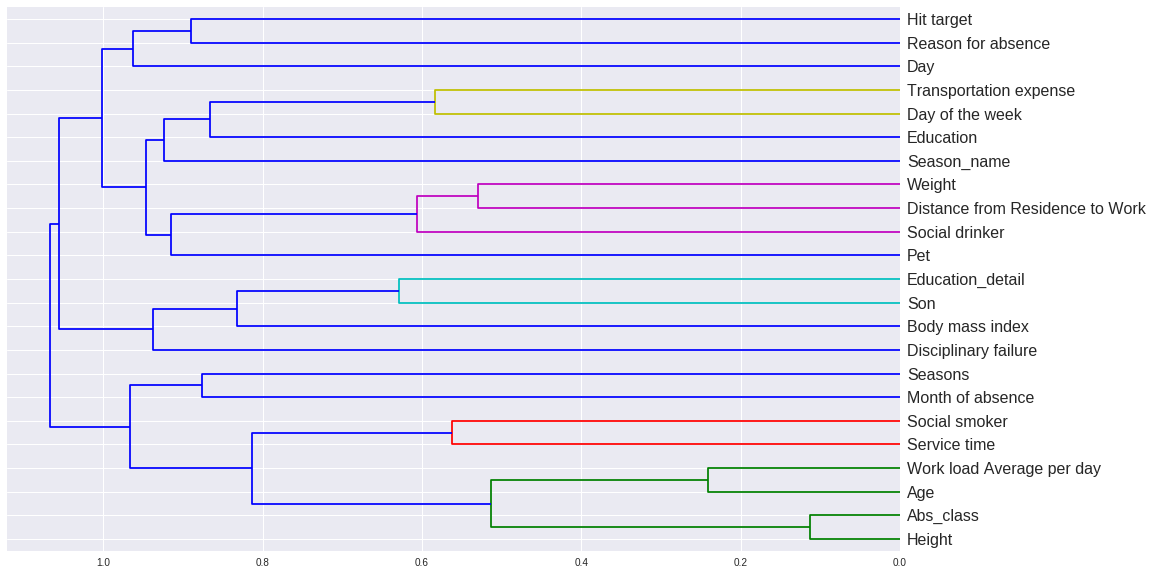

In [0]:
corr = np.round(spearmanr(data.drop(labels =['Absenteeism time in hours', 'Abs_class'], axis=1)).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=data.drop('Absenteeism time in hours', axis=1).columns, orientation='left', leaf_font_size = 16)
plt.show()

In [0]:
data.dtypes

ID                                    int64
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense                int64
Distance from Residence to Work       int64
Service time                          int64
Age                                   int64
Work load Average per day           float64
Hit target                            int64
Disciplinary failure               category
Education                          category
Son                                   int64
Social drinker                     category
Social smoker                      category
Pet                                   int64
Weight                                int64
Height                                int64
Body mass index                       int64
Absenteeism time in hours             int64
Abs_class                          category
Day                             

# **QUESTION: 1 and 2**

**Train-Test Split, Feature Selection, Accuracy on Test Data as well as Whole Data** <a name="paragraph3"></a>

Recursive Feature Elimination which is a type of wrapper feature selection method.

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

*In Question 2, we have fit the model on training data and computed the accuracy on train data as well as whole data*

**Note:**
We didn't do feature selection by optimizing "*max_features*" hyperparameter via **GridSearchCV** because *max_features* sets limit on the number of features to consider when looking for the best split at each split. Thus, setting *max_features* to, say, 4, will mean that at each split, the DecisionTreeClassifier will pick up the best 4 features as per that split. In fact, the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively ***inspect more than max_features features***.

However, the question asks us to do feature selection, i.e., we have to select a group of features and build a decision tree using only those features. This is achieved by Recursive Feature Elimination (RFE).

In [0]:
y = data['Abs_class']

In [0]:
X = data.drop(labels =['Absenteeism time in hours', 'Abs_class','Day','Season_name','Education_detail'], axis=1)

In [0]:
X.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average per day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'],
      dtype='object')

## QUESTION: 1 <a name="subparagraph4"></a>

**Splitting whole data in train-test and checking average accuracy on Test Set**

In [0]:
scores = []
reports = []
for i in range(20):
  print("Iteration:", i+1)
  #Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
  features = X_train.columns

  # Feature extraction
  dt = DecisionTreeClassifier(criterion="gini")
  rfe = RFE(dt, 10)
  fit = rfe.fit(X_train, y_train)
  print("Selected Features: %s" % (features[fit.support_]))
  

  # Fitting the decision tree classifier on a decision tree
  model = dt.fit(X_train[features[fit.support_]], y_train)

  #Predictions on test set
  y_pred = model.predict(X_test[features[fit.support_]])
  #y_pred_proba = model.predict_proba(X_test[features[fit.support_]])
  
  #Calculating socre
  score = accuracy_score(y_test,y_pred)
  report = classification_report(y_test,y_pred)
  scores.append(score)
  reports.append(report)
  print()
  print("Accuracy using Gini INDEX:",score)
  print("Classification Report:\n", report)
  print("---"*30)

print("Average Accuracy on Test Data:", np.array(scores).mean())

Iteration: 1
Selected Features: Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Transportation expense', 'Distance from Residence to Work',
       'Work load Average per day', 'Hit target', 'Son', 'Body mass index'],
      dtype='object')

Accuracy using Gini INDEX: 0.7702702702702703
Classification Report:
               precision    recall  f1-score   support

        Days       0.68      0.64      0.66        50
       Hours       0.83      0.84      0.83        85
  Not Absent       1.00      1.00      1.00         9
       Weeks       0.33      0.50      0.40         4

    accuracy                           0.77       148
   macro avg       0.71      0.74      0.72       148
weighted avg       0.77      0.77      0.77       148

------------------------------------------------------------------------------------------
Iteration: 2
Selected Features: Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Age', 'Work load

## QUESTION: 2 <a name="subparagraph5"></a>

### Train-Test Split, Feature Selection, Accuracy on Whole Data  <a name="heading1"></a>

In [0]:
# For whole dataset after training on a portion of it.
scores = []
reports = []
for i in range(20):
  print("Iteration:", i+1)
  #Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
  features = X_train.columns

  # Feature extraction
  dt = DecisionTreeClassifier(criterion="gini")
  rfe = RFE(dt, 10)
  fit = rfe.fit(X_train, y_train)

  print("Selected Features: %s" % (features[fit.support_]))

  # Fitting the decision tree classifier on a decision tree
  model = dt.fit(X_train[features[fit.support_]], y_train)

  #Predictions on test set
  y_pred = model.predict(X[features[fit.support_]])
  
  #Calculating socre
  score = accuracy_score(y,y_pred)
  report = classification_report(y,y_pred)
  scores.append(score)
  reports.append(report)
  print()
  print("Accuracy using Gini INDEX:",score)
  print("Classification Report:\n", report)
  print("---"*30)

print("Average Accuracy on Whole Dataset:", np.array(scores).mean())

Iteration: 1
Selected Features: Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Transportation expense', 'Age', 'Work load Average per day',
       'Hit target', 'Son', 'Body mass index'],
      dtype='object')

Accuracy using Gini INDEX: 0.9417344173441734
Classification Report:
               precision    recall  f1-score   support

        Days       0.91      0.92      0.92       249
       Hours       0.96      0.95      0.96       425
  Not Absent       1.00      1.00      1.00        42
       Weeks       0.82      0.82      0.82        22

    accuracy                           0.94       738
   macro avg       0.92      0.92      0.92       738
weighted avg       0.94      0.94      0.94       738

------------------------------------------------------------------------------------------
Iteration: 2
Selected Features: Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Age', '

### Train-Test Split, Feature Selection, Accuracy on Train Data  <a name="heading2"></a>

In [0]:
scores_train = []
reports_train = []
for i in range(20):
  print("Iteration:", i+1)
  #Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
  features = X_train.columns

  # Feature extraction
  dt = DecisionTreeClassifier(criterion="gini")
  rfe = RFE(dt, 10)
  fit = rfe.fit(X_train, y_train)
  print("Selected Features: %s" % (features[fit.support_]))

  # Fitting the decision tree classifier on a decision tree
  model = dt.fit(X_train[features[fit.support_]], y_train)

  #Predictions on test set
  y_pred = model.predict(X_train[features[fit.support_]])
  
  #Calculating socre
  score = accuracy_score(y_train,y_pred)
  report = classification_report(y_train,y_pred)
  scores_train.append(score)
  reports_train.append(report)
  print()
  print("Accuracy using Gini INDEX:",score)
  print("Classification Report:\n", report)
  print("---"*30)

print("Average Accuracy:", np.array(scores_train).mean())

Iteration: 1
Selected Features: Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Transportation expense', 'Age', 'Work load Average per day',
       'Hit target', 'Son', 'Body mass index'],
      dtype='object')

Accuracy using Gini INDEX: 0.9949152542372881
Classification Report:
               precision    recall  f1-score   support

        Days       0.99      0.99      0.99       199
       Hours       1.00      1.00      1.00       340
  Not Absent       1.00      1.00      1.00        33
       Weeks       1.00      0.94      0.97        18

    accuracy                           0.99       590
   macro avg       1.00      0.98      0.99       590
weighted avg       0.99      0.99      0.99       590

------------------------------------------------------------------------------------------
Iteration: 2
Selected Features: Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Service

# **QUESTION: 3** <a name="paragraph4"></a>

## **Finding Best depth limit** 

## Using Cost Complexity Pruning via *ccp_alpha*

### *Train-test split of data*

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=SEED)

In [0]:
features = X_train.columns

# Feature extraction
dt = DecisionTreeClassifier(criterion="gini")
rfe = RFE(dt, 10)
fit = rfe.fit(X_train, y_train)
print("Selected Features: %s" % (features[fit.support_]))

Selected Features: Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Transportation expense', 'Age', 'Work load Average per day',
       'Hit target', 'Son', 'Body mass index'],
      dtype='object')


### *Decision Tree Classifier with pruning*

<center> $ \mathbf {ALGORITHM}$:  </center>

1. Use recursive binary splitting to grow a large tree on the training
data, stopping only when each terminal node has fewer than some
minimum number of observations.

2. Apply cost complexity pruning to the large tree in order to obtain a
sequence of best subtrees, as a function of $\alpha$.

3. Use K-fold cross-validation to choose $\alpha$. That is, divide the training observations into K folds. For each k = 1, . . ., K:
  
  (a) Repeat Steps 1 and 2 on all but the $k^{th}$ fold of the training data.
  
  (b) Evaluate the accuracy score on the data in the left-out $k^{th}$ fold, as a function of $\alpha$.

4. Average the results for each value of $\alpha$, and pick $\alpha$ to maximize the accuracy score.

5. Return the subtree from Step 2 that corresponds to the chosen value
of $\alpha$.

<center> $ \mathbf {Minimal \ Cost \ Complexity \ Pruning}$ </center> 



* Minimal cost complexity pruning recursively finds the node with the “weakest link”.
* The weakest link is characterized by an effective $\alpha$, where the nodes with the smallest effective alpha are pruned first.
* To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides *DecisionTreeClassifier.cost_complexity_pruning_path* that returns the effective $\alpha$'s and the corresponding total leaf impurities at each step of the pruning process.

* As $\alpha$ increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [0]:
clf = DecisionTreeClassifier(random_state=SEED)

path = clf.cost_complexity_pruning_path(X_train[features[fit.support_]], y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

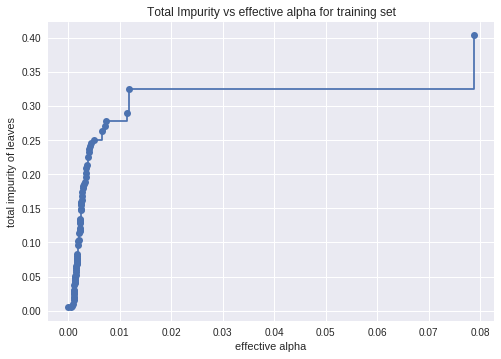

In [0]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [0]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1729, ccp_alpha=ccp_alpha)
    model = clf.fit(X_train[features[fit.support_]], y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15537459761213113


Now, we remove the last element in the classifiers (clfs) and ccp_alphas, because it is the trivial tree with only one node. It can be seen that the number of nodes and tree depth decreases as alpha increases.

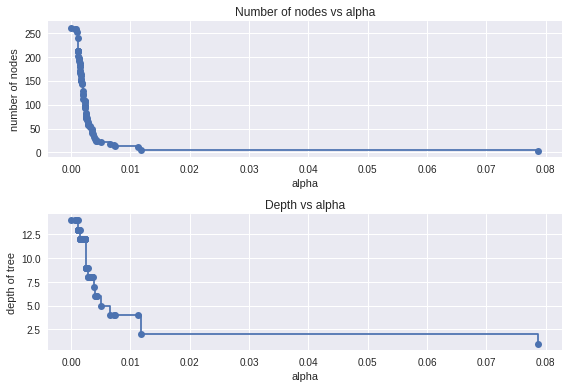

In [0]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 99% training accuracy. As $\alpha$ increases, more of the tree is pruned, thus creating a decision tree that generalizes better.

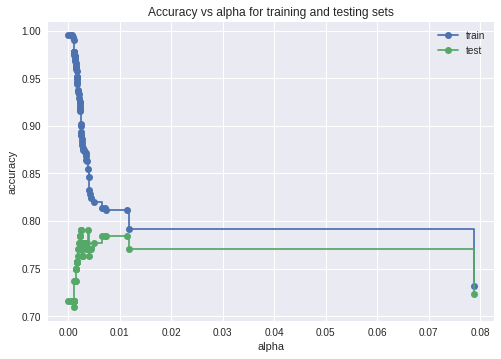

In [0]:
train_scores = [clf.score(X_train[features[fit.support_]], y_train) for clf in clfs]
test_scores = [clf.score(X_test[features[fit.support_]], y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### *CCP using Cross-validated Decision tree*

In [0]:
clf = DecisionTreeClassifier(max_depth=None, random_state=SEED)

path = clf.cost_complexity_pruning_path(X_train[features[fit.support_]], y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [0]:
# alpha corresponding to a single-node tree
ccp_alpha_last = ccp_alphas[-1]

In [0]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node

In [0]:
len(ccp_alphas)

69

In [0]:
clfs = []
CV_scores= []

for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=1729)
  CV_score = cross_val_score(estimator=clf, X=X_train[features[fit.support_]], y=y_train, cv=10, scoring='accuracy', n_jobs=-1, verbose=0) 
  clfs.append(clf)
  CV_scores.append(CV_score.mean())    # Compute the 10-folds CV_scores    

Text(0.5, 1.0, 'Total accuracy vs effective alpha for data set')

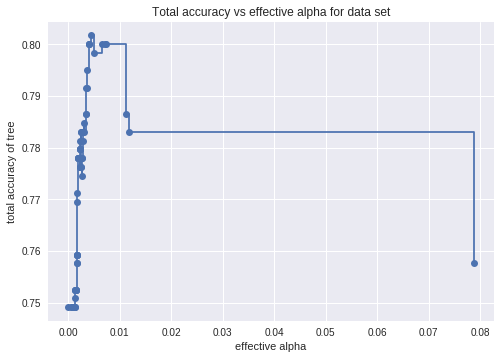

In [0]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas, CV_scores, marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total accuracy of tree")
ax.set_title("Total accuracy vs effective alpha for data set")

Extraction of index corresponding to maximum CV_scores(cross-validation accuracy)

In [0]:
# It is the index of the optimum value of alpha giving maximum accuracy (obtained from cost complexity pruning)
index_alpha=CV_scores.index(max(CV_scores))
print(index_alpha)

61


$\alpha$ corresponding to maximum cross-validation accuracy in training data set

In [0]:
ccp_alphas[index_alpha]

0.004378531073446328

In [0]:
# Building a pruned decision tree
clf = DecisionTreeClassifier(ccp_alpha=ccp_alphas[index_alpha], random_state=SEED)

In [0]:
model = clf.fit(X_train[features[fit.support_]],y_train)

In [0]:
print("The best depth from Cost Complexity Pruning:", clf.get_depth())

The best depth from Cost Complexity Pruning: 6


In [0]:
# Prediction on test set using cost-complexity pruned decision tree
y_pred = model.predict(X_test[features[fit.support_]])

In [0]:
# Classification report for predicted values
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Days       0.57      0.84      0.68        43
       Hours       0.91      0.76      0.83        94
  Not Absent       1.00      1.00      1.00         7
       Weeks       0.00      0.00      0.00         4

    accuracy                           0.77       148
   macro avg       0.62      0.65      0.63       148
weighted avg       0.79      0.77      0.77       148



In [0]:
print("Accuracy score of predictions from pruned decision tree:", accuracy_score(y_test,y_pred))

Accuracy score of predictions from pruned decision tree: 0.7702702702702703


## Best Depth Using Hyperparameter Optimization

In [0]:
params_dt = {
  'max_depth':[1,2,3,4,5,6,7,8,9,10,None]
}

clf_hypopt = GridSearchCV( estimator=DecisionTreeClassifier(random_state=SEED), 
                    param_grid = params_dt, 
                    cv=20,
                    scoring='accuracy',
                    n_jobs = -1)

model_grid = clf_hypopt.fit(X_train, y_train)
print('Best depth:', clf_hypopt.best_params_['max_depth'])
clf_hypopt_best = clf1.best_estimator_

Best depth: 6


#  **QUESTION: 4** <a name="paragraph5"></a>

## **Finding Overfitting**

In [0]:
clf = DecisionTreeClassifier(ccp_alpha = ccp_alphas[index_alpha], random_state=SEED)

In [0]:
clf_baseline = DecisionTreeClassifier(ccp_alpha = ccp_alpha_last, random_state=SEED)  # Classifier with only one node

In [0]:
accuracy_cv = cross_val_score(clf, X_train[features[fit.support_]], y_train, cv=10, scoring = "accuracy", n_jobs=-1)

In [0]:
model = clf.fit(X_train[features[fit.support_]],y_train)
model_baseline = clf_baseline.fit(X_train[features[fit.support_]],y_train)

In [0]:
y_pred = model.predict(X_test[features[fit.support_]])
y_pred_baseline = model_baseline.predict(X_test[features[fit.support_]])

y_pred_train = model.predict(X_train[features[fit.support_]])
y_pred_train_baseline = model_baseline.predict(X_train[features[fit.support_]])

In [0]:
accuracy_test = accuracy_score(y_test,y_pred)
accuracy_test_baseline = accuracy_score(y_test,y_pred_baseline)

accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy__train_baseline = accuracy_score(y_train,y_pred_train_baseline)

In [0]:
accuracy_test

0.7702702702702703

In [0]:
accuracy_train

0.823728813559322

In [0]:
accuracy_cv.mean()

0.8016949152542374

In [0]:
accuracy__train_baseline

0.5610169491525424

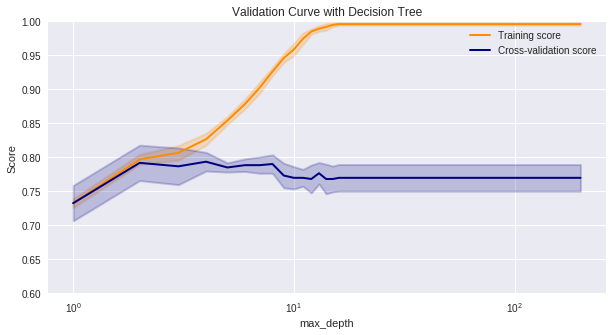

In [0]:
param_range = range(1,200)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(random_state=SEED), X_train[features[fit.support_]], y_train, param_name="max_depth", param_range=param_range, scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.title("Validation Curve with Decision Tree")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.6, 1)
lw = 2
#plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw, subsx =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)

#plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",color="navy", lw=lw, subsx =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)

plt.legend(loc="best")

In [0]:
print("The best depth from Cost Complexity Pruning:", clf.get_depth())

The best depth from Cost Complexity Pruning: 6


In [0]:
print("The best depth from 20-fold Cross-Validation Grid Search of Hyperparameter 'max_depth':", clf_hypopt.best_params_['max_depth'])

The best depth from 20-fold Cross-Validation Grid Search of Hyperparameter 'max_depth': 6


From the Validation Plot above, we can see that the depth achieved from cost-complexity pruning (i.e; 6) lies in the optimal region. Thus, our decision tree model obtained from cost-complexity with max_depth=6 pruning does not overfit, since here train-score is approximately equal to cross-validation-score. 

# **QUESTION: 5** <a name="paragraph6"></a>

## **Effect of Amount of Training Data** 

In [0]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,train_sizes=train_sizes, return_times=True)
        
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [0]:
ccp_alphas[index_alpha]

0.004378531073446328

In [0]:
clf.get_depth()

6

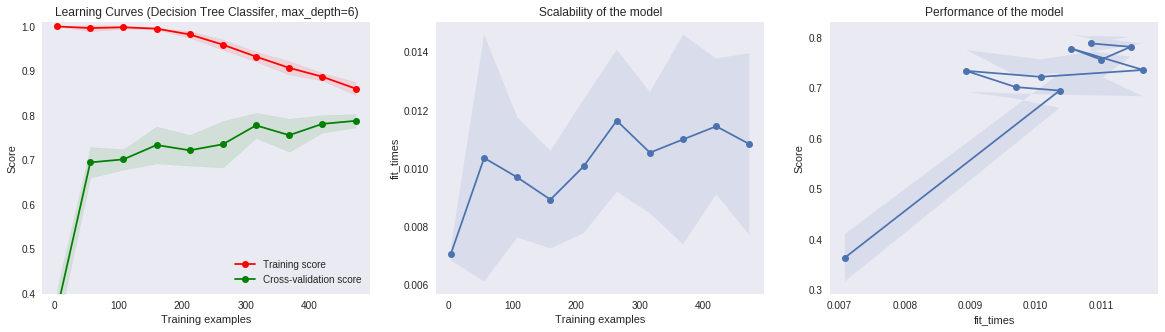

In [0]:
#fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = r"Learning Curves (Decision Tree Classifer, max_depth=6)"

#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(ccp_alpha = ccp_alphas[index_alpha], random_state=SEED)
plot_learning_curve(estimator, title, X_train[features[fit.support_]], y_train, ylim=(0.4, 1.01),cv=5, n_jobs=-1,train_sizes=np.linspace(.01, 1.0, 10))
plt.show()

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. 
We can clearly see that as the number of training examples is increased, the training and cross-validation score come closer to convergence. Further, there is a significant improvement in cross-validation-score as the number of training examples is increased. Hence, adding more training examples will improve generalization

# **QUESTION: 6** <a name="paragraph7"></a>

## **Multiple Discriminant Analysis** 

## *Train-Test Split, Feature Selection, Accuracy on Test Data as well as Whole Data*

In [0]:
y = data['Abs_class']

In [0]:
X = data.drop(labels =['Absenteeism time in hours', 'Abs_class','Day','Season_name','Education_detail'], axis=1)

#### On Test Data

In [0]:
scores = []
reports = []
for i in range(20):
  print("Iteration:", i+1)
  #Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
  features = X_train.columns

  # Feature extraction
  clf = LinearDiscriminantAnalysis()
  rfe = RFE(clf, 10)
  fit = rfe.fit(X_train, y_train)
  print("Selected Features: %s" % (features[fit.support_]))

  # Fitting the decision tree classifier on a decision tree
  model = clf.fit(X_train[features[fit.support_]], y_train)

  #Predictions on test set
  y_pred = model.predict(X_test[features[fit.support_]])
  y_pred_proba = model.predict_proba(X_test[features[fit.support_]])
  
  #Calculating socre
  score = accuracy_score(y_test,y_pred)
  report = classification_report(y_test,y_pred)
  scores.append(score)
  reports.append(report)
  print()
  print("Accuracy using Gini INDEX:",score)
  print("Classification Report:\n", report)
  print("---"*30)

  print("Average Accuracy on Test Data:", np.array(scores).mean())

Iteration: 1
Selected Features: Index(['Reason for absence', 'Month of absence', 'Day of the week',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Body mass index'],
      dtype='object')

Accuracy using Gini INDEX: 0.722972972972973
Classification Report:
               precision    recall  f1-score   support

        Days       0.62      0.52      0.57        50
       Hours       0.76      0.85      0.80        85
  Not Absent       1.00      1.00      1.00         9
       Weeks       0.00      0.00      0.00         4

    accuracy                           0.72       148
   macro avg       0.59      0.59      0.59       148
weighted avg       0.71      0.72      0.71       148

------------------------------------------------------------------------------------------
Average Accuracy on Test Data: 0.722972972972973
Iteration: 2
Selected Features: Index(['Reason for absence', 'Month of absence', 'Day of the week',
       'Disci

#### On Whole Dataset

In [0]:
scores = []
reports = []
for i in range(20):
  print("Iteration:", i+1)
  #Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
  features = X_train.columns

  # Feature extraction
  clf = LinearDiscriminantAnalysis()
  rfe = RFE(clf, 10)
  fit = rfe.fit(X_train, y_train)
  print("Selected Features: %s" % (features[fit.support_]))

  # Fitting the decision tree classifier on a decision tree
  model = clf.fit(X_train[features[fit.support_]], y_train)

  #Predictions on whole dataset
  y_pred = model.predict(X[features[fit.support_]])
  y_pred_proba = model.predict_proba(X[features[fit.support_]])
  
  #Calculating socre
  score = accuracy_score(y,y_pred)
  report = classification_report(y,y_pred)
  scores.append(score)
  reports.append(report)
  print()
  print("Accuracy using Gini INDEX:",score)
  print("Classification Report:\n", report)
  print("---"*30)

print("Average Accuracy on Whole Dataset:", np.array(scores).mean())

Iteration: 1
Selected Features: Index(['Reason for absence', 'Day of the week', 'Disciplinary failure', 'Son',
       'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height',
       'Body mass index'],
      dtype='object')

Accuracy using Gini INDEX: 0.7276422764227642
Classification Report:
               precision    recall  f1-score   support

        Days       0.62      0.53      0.57       249
       Hours       0.76      0.86      0.81       425
  Not Absent       1.00      0.93      0.96        42
       Weeks       0.27      0.14      0.18        22

    accuracy                           0.73       738
   macro avg       0.66      0.61      0.63       738
weighted avg       0.71      0.73      0.72       738

------------------------------------------------------------------------------------------
Iteration: 2
Selected Features: Index(['Reason for absence', 'Disciplinary failure', 'Education', 'Son',
       'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height',


## *Train-Test Split, Feature Selection, Accuracy on Train Data* 


In [0]:
scores_train = []
reports_train = []
for i in range(20):
  print("Iteration:", i+1)
  #Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
  features = X_train.columns

  # Feature extraction
  clf = LinearDiscriminantAnalysis()
  rfe = RFE(clf, 10)
  fit = rfe.fit(X_train, y_train)
  print("Selected Features: %s" % (features[fit.support_]))

  # Fitting the decision tree classifier on a decision tree
  model = dt.fit(X_train[features[fit.support_]], y_train)

  #Predictions on test set
  y_pred = model.predict(X_train[features[fit.support_]])
  
  #Calculating socre
  score = accuracy_score(y_train,y_pred)
  report = classification_report(y_train,y_pred)
  scores_train.append(score)
  reports_train.append(report)
  print()
  print("Accuracy using Gini Index:",score)
  print("Classification Report:\n", report)
  print("---"*30)
print("Average Accuracy on Train Data:", np.array(scores_train).mean())

Iteration: 1
Selected Features: Index(['Month of absence', 'Disciplinary failure', 'Education', 'Son',
       'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height',
       'Body mass index'],
      dtype='object')

Accuracy using Gini Index: 0.8355932203389831
Classification Report:
               precision    recall  f1-score   support

        Days       0.76      0.80      0.78       199
       Hours       0.87      0.87      0.87       340
  Not Absent       1.00      1.00      1.00        33
       Weeks       0.75      0.33      0.46        18

    accuracy                           0.84       590
   macro avg       0.84      0.75      0.78       590
weighted avg       0.84      0.84      0.83       590

------------------------------------------------------------------------------------------
Iteration: 2
Selected Features: Index(['Month of absence', 'Disciplinary failure', 'Education', 'Son',
       'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height',
       'Bo